In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from google.colab import files
_=files.upload()

Saving car_price.csv to car_price (2).csv


#Часть 1

Создание датафрейма

In [ ]:
d = {'x1' : [3, 3, 6, 6, 7, 8, 9, 9, 11, 12 ], 'target' : [30.8, 31.1, 30.4, 31.7, 30.5, 33.5, 31, 34.5, 36, 32.9]}
df = pd.DataFrame(data=d)
df.head(10)

,x1,target
0,3,30.8
1,3,31.1
2,6,30.4
3,6,31.7
4,7,30.5
5,8,33.5
6,9,31.0
7,9,34.5
8,11,36.0
9,12,32.9


Обучение модели линейной регрессии и выполнение предсказания

In [ ]:
y = df['target']
X = df['x1']

X_train,X_valid,y_train,y_valid = train_test_split(X, y, test_size=0.25, random_state=0)

model = LinearRegression()

model.fit(np.array(X_train).reshape(-1,1), y_train) # reshape(-1, 1) используется для проеобразования одномерного в двумерный массив, при этом -1 ставится для того чтобы numpy сам определил количество элементов в выборке

predictions_valid = model.predict(np.array(X_valid).reshape(-1,1))

Создание и вывод датафрейма с истинными и предсказанными значениями, а также расчет и вывод метрик качества регрессии.

In [ ]:
df_match = pd.DataFrame({'Actual': y_valid, 'Predicted':predictions_valid})

print(df_match.head(3))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, predictions_valid)) # средняя абсолютная ошибка

print('Mean Squared Error:', metrics.mean_squared_error(y_valid, predictions_valid)) # среднее значение квадратов ошибок. Чем меньше MSE, тем более точно модель предсказывает значения

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, predictions_valid))) # квадратный корень из среднего квадрата ошибок

print('R2 metric:', metrics.r2_score(y_valid, predictions_valid)) # коэффициент детерминации. Определяет долю изменений, обусловленных влиянием признаков на целевую переменную


   Actual  Predicted
2    30.4  31.915385
8    36.0  33.223077
4    30.5  32.176923
Mean Absolute Error: 1.9897435897435887
Mean Squared Error: 4.273254437869817
Root Mean Squared Error: 2.0671851484252244
R2 metric: 0.37586351929846884


На основе данных метрик можно сделать следующие выводы:


*   Значение MAE в 1.99 говорит о том, что модель в среднем ошибается на эту величину при прогнозировании.
*   Значение MSE довольно большое, что может указывать на наличие больших ошибок в модели.
*   Значение RMSE также довольно большое, что указывает на значительную дисперсию ошибок
*   Значение R2 равное 0.38 означает, что модель объясняет около 38% изменчивости в данных. Это может интерпретироваться как не очень хорошая способность модели прогнозировать.

Вывод значений коэффициентов a и b.

In [ ]:
a = model.coef_
b = model.intercept_
print(f'Коэффициент наклона = {a}, коэффициент сдвига = {b}')

Коэффициент наклона = [0.26153846], коэффициент сдвига = 30.346153846153847


Выполнение визуализации регрессии.

Text(0.5, 1.0, 'Линейная регрессия')

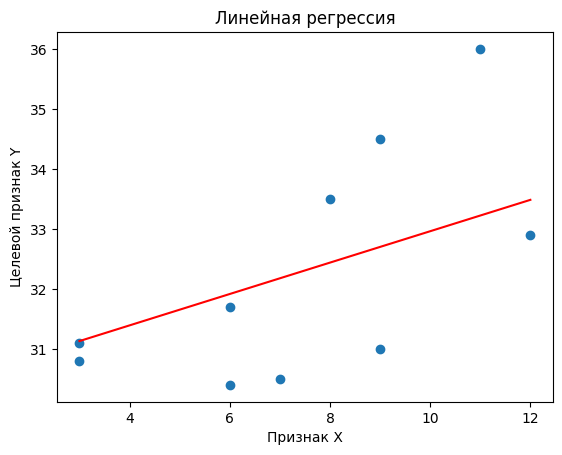

In [ ]:
plt.scatter(df['x1'], df['target']) # точечный график

# y=ax+b:
plt.plot(X, a*X+b, "r")
plt.xlabel('Признак X')
plt.ylabel('Целевой признак Y')
plt.title('Линейная регрессия')

Построение графика разности предсказанного и истинного значения по каждой точке.

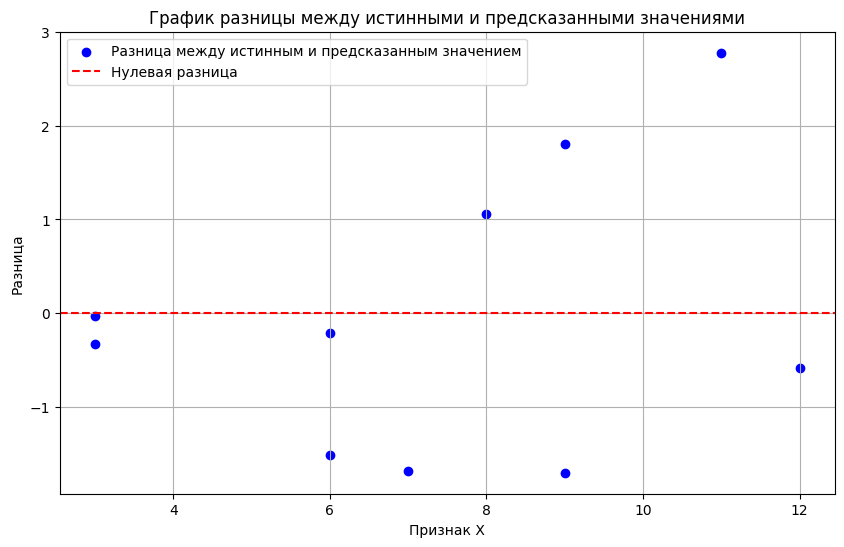

In [ ]:
df2 = pd.DataFrame()
df2['prediction'] = model.predict(df['x1'].values.reshape(-1, 1))
df2['difference'] = df['target'] - df2['prediction']

plt.figure(figsize=(10, 6))
plt.scatter(df['x1'], df2['difference'], c='blue', label='Разница между истинным и предсказанным значением')
plt.axhline(y=0, color = 'r', linestyle = '--', label = 'Нулевая разница')
plt.xlabel('Признак X')
plt.ylabel('Разница')
plt.legend()
plt.title('График разницы между истинными и предсказанными значениями')
plt.grid()
plt.show()

Построение графика предсказанных и истиных значений.

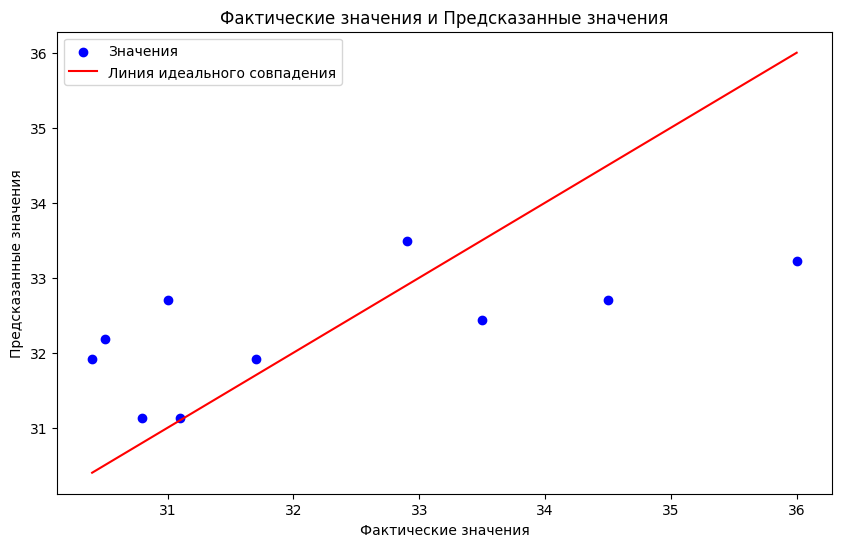

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['target'], df2['prediction'], color='blue', label = 'Значения')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактические значения и Предсказанные значения')

plt.plot([min(df['target']), max(df['target'])], [min(df['target']), max(df['target'])], color='red', label = 'Линия идеального совпадения')

plt.legend()
plt.show()

На основе постренных графиков можно сделать вывод что с помощью машинного обучения можно предсказывать значения целевой переменной в простой линейной регрессии с небольшой точностью. Для получения более высокой точности необходимо увеличить количество входных данных.

#Часть 2

Обучение модели множественной линейной регрессии, а также выполнение предсказания.

In [ ]:
df['x2'] = [9, 8, 9, 7, 4, 5, 3, 5, 1, 0]
y = np.array(df['target'])
X = np.array(df.drop(['target'], axis=1))

model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

Создание и вывод датафрейма с истинными и предсказанными значениями.

In [ ]:
df_match = pd.DataFrame({'Actual': y, 'Predicted': predictions })
df_match.head(10)

,Actual,Predicted
0,30.8,30.374439
1,31.1,30.280646
2,30.4,31.895817
3,31.7,31.708231
4,30.5,31.933977
5,33.5,32.534896
6,31.0,32.854436
7,34.5,33.042022
8,36.0,33.681101
9,32.9,34.094434


Подсчет и вывод метрик качества регрессии.


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions)) # средняя абсолютная ошибка

print('Mean Squared Error:', metrics.mean_squared_error(y, predictions)) # среднее значение квадратов ошибок. Чем меньше MSE, тем более точно модель предсказывает значения

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, predictions))) # квадратный корень из среднего квадрата ошибок

print('R2 metric:', metrics.r2_score(y, predictions)) # коэффициент детерминации. Определяет долю изменений, обусловленных влиянием признаков на целевую переменную

Mean Absolute Error: 1.1973789846517118
Mean Squared Error: 1.8446290268173384
Root Mean Squared Error: 1.358171206739908
R2 metric: 0.4390496816636241


На основе данных метрик можно сделать следующие выводы:


*   Значение MAE в 1.19 говорит о том, что модель в среднем ошибается на эту величину при прогнозировании.
*   Значение MSE относительно небольшое, что может указывать на наличие небольших ошибок в модели.
*   Значение RMSE также небольшое, что указывает на незначительную дисперсию ошибок
*   Значение R2 равное 0.44 означает, что модель объясняет около 44% изменчивости в данных. Это может интерпретироваться как не очень хорошая способность модели прогнозировать.

Вывод значений коэффициентов a и b.

In [ ]:
a = model.coef_
b = model.intercept_
print(f'Коэффициенты наклона = {a}, коэффициент сдвига = {b}')

Коэффициенты наклона = [0.50712599 0.09379322], коэффициент сдвига = 28.008922246584582


Построение графика фактических и предсказанных значений

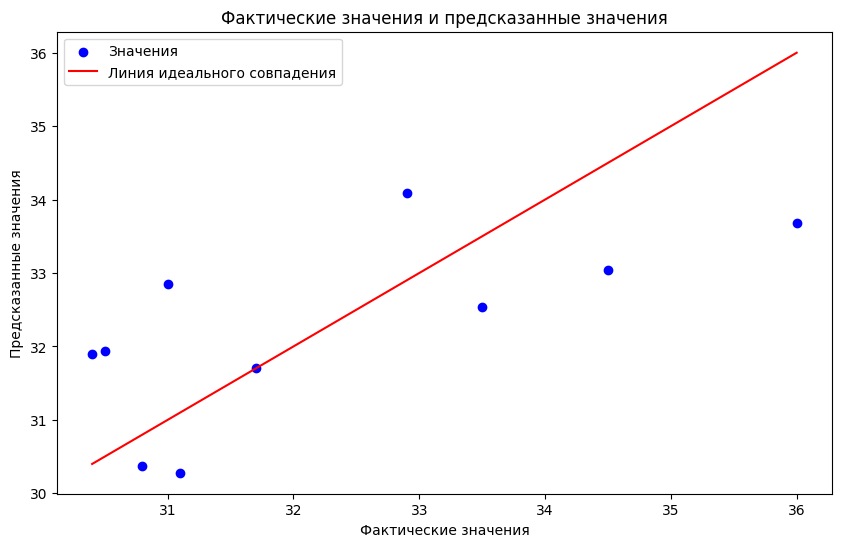

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['target'], predictions, color='blue', label = 'Значения')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактические значения и предсказанные значения')

plt.plot([min(df['target']), max(df['target'])], [min(df['target']), max(df['target'])], color='red', label = 'Линия идеального совпадения')

plt.legend()
plt.show()

На основе полученных метрик и графиков можно прийти к выводу - модель множественной линейной регрессии на основе 10 точек достаточно неточно предсказывает значения. Увеличение количества данных приведет к повышению точности модели.



#Часть 3

Создание датафрейма.

In [ ]:
d = {'x' : [i for i in range(0, 10)], 'target' : [26.6, 45.7, 63.8, 78.3, 86.4, 97.7, 96.9, 113.6, 113.6, 120.9]}
df = pd.DataFrame(data=d)
df.head(10)

,x,target
0,0,26.6
1,1,45.7
2,2,63.8
3,3,78.3
4,4,86.4
5,5,97.7
6,6,96.9
7,7,113.6
8,8,113.6
9,9,120.9


Обучение модели полиномиальной регрессии со степенью 2, выполнение предсказания и сравнение предсказания с истинными значениями.

При степени полинома 2 метрики принимают значения:

Mean Absolute Error: 2.480181818181851
R2 metric: 0.9882159700895583
При степени полинома 2 линия регрессии принимает вид: 



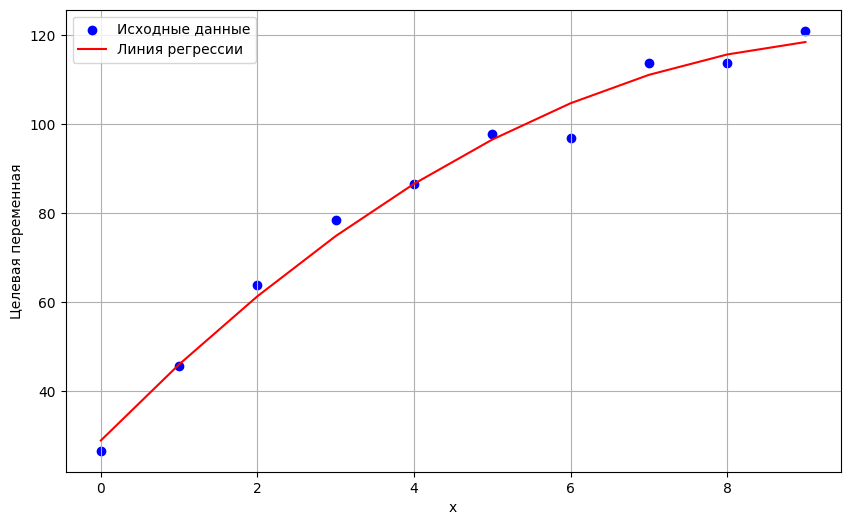

При степени полинома 4 метрики принимают значения:

Mean Absolute Error: 1.8187179487205547
R2 metric: 0.9923787257466807
При степени полинома 4 линия регрессии принимает вид: 



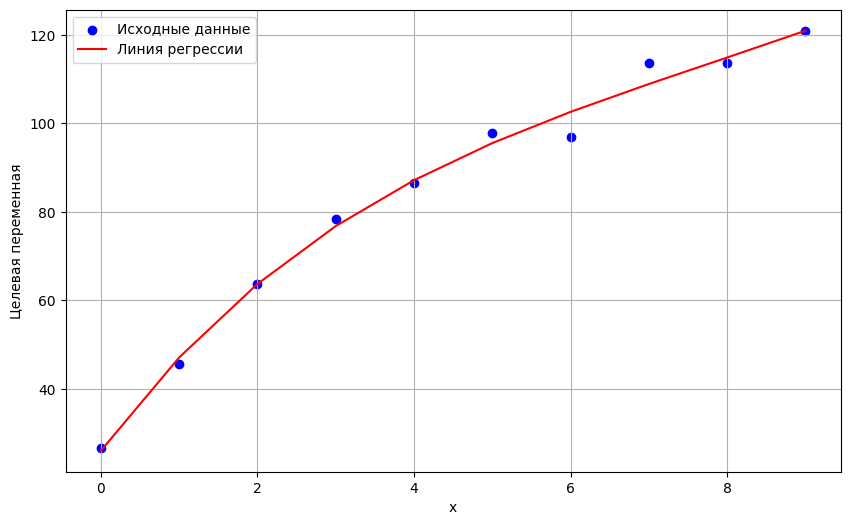

При степени полинома 6 метрики принимают значения:

Mean Absolute Error: 1.6595244755147973
R2 metric: 0.9932748544104846
При степени полинома 6 линия регрессии принимает вид: 



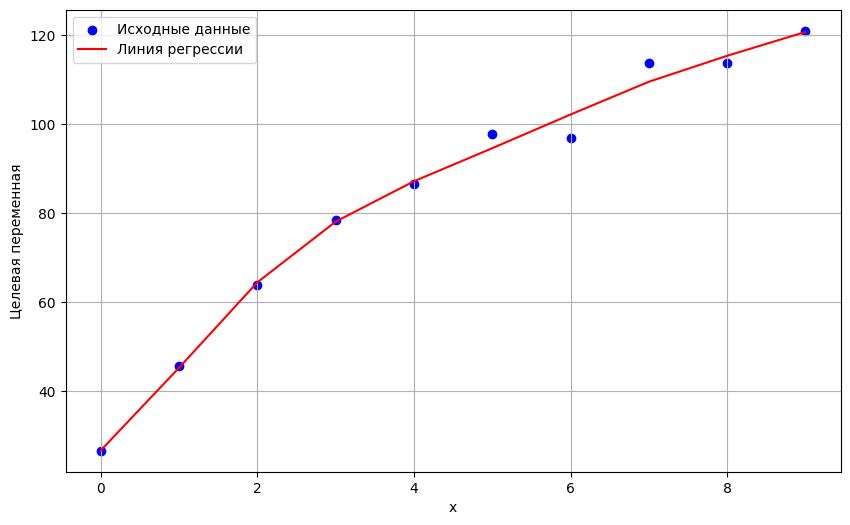

При степени полинома 8 метрики принимают значения:

Mean Absolute Error: 1.1977556493617592
R2 metric: 0.9969327104426542
При степени полинома 8 линия регрессии принимает вид: 



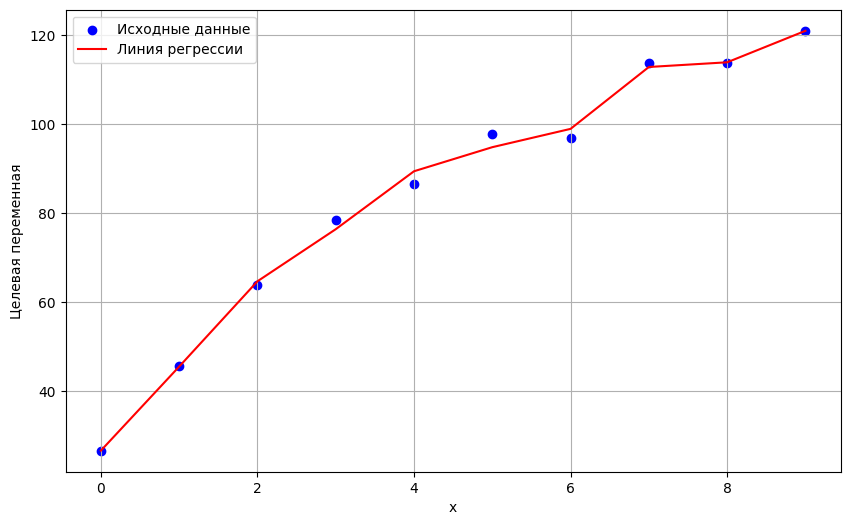

При степени полинома 10 метрики принимают значения:

Mean Absolute Error: 1.2626512813085355e-08
R2 metric: 1.0
При степени полинома 10 линия регрессии принимает вид: 



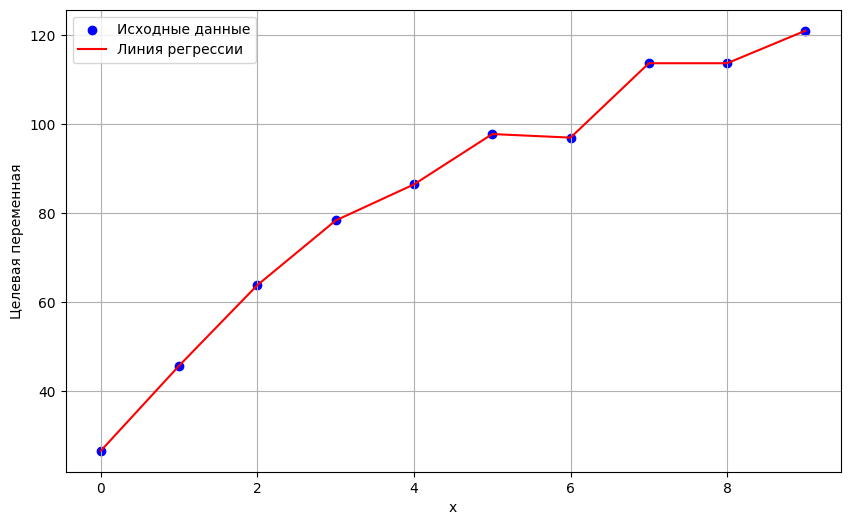

In [ ]:
y = np.array(df['target'])
X = np.array(df['x'])

for i in range(2,11,2):
  poly_features = PolynomialFeatures(degree=i)
  X_poly = poly_features.fit_transform(X.reshape(-1, 1))

  lin_reg = LinearRegression()
  lin_reg.fit(X_poly, y)
  predictions=lin_reg.predict(X_poly)

  print(f'При степени полинома {i} метрики принимают значения:\n')
  print('Mean Absolute Error:', metrics.mean_absolute_error(df['target'], predictions)) # средняя абсолютная ошибка
  print('R2 metric:', metrics.r2_score(df['target'], predictions)) # коэффициент детерминации. Определяет долю изменений, обусловленных влиянием признаков на целевую переменную

  print(f'При степени полинома {i} линия регрессии принимает вид: \n')
  plt.figure(figsize=(10, 6))
  plt.scatter(df['x'], df['target'], label='Исходные данные', color='blue')
  plt.plot(df['x'], predictions, label='Линия регрессии', color='red')
  plt.xlabel('x')
  plt.ylabel('Целевая переменная')
  plt.legend()
  plt.grid()
  plt.show()

На основе полученных графиков и метрик можно сделать вывод, что увеличение степени полинома приводит к переобучению. Модель фактически "запоминает" значения целевой переменной для каждой точки x, что может привести к некорректным предсказаниям для новых точек, на которых модель не обучалась.

#Часть 4

Чтение файла

In [ ]:
df=pd.read_csv('car_price.csv')

# Целевой переменной, которую необходимо предсказать, в данном наборе данных является "price" (цена автомобиля). Это обосновано тем, что обычно в задачах анализа данных о продаже автомобилей основной интерес заключается в предсказании цены, и это может быть полезной информацией для покупателей, продавцов или страховых компаний.
Помимо целевой переменной, в датасете содержатся параметры, которые могут влиять на данную переменную. Некоторые параметры из датасета:
* carCompany - название автомобильной компании;
* carCompany - кузов автомобиля;
* carwidth - ширина автомобиля;
* highwaympg - пробег по шоссе;
* citympg - пробег по городу.

Пример записей в датасете.

In [ ]:
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Визуализация целевой переменной (цены) с помощью гистограммы и boxplot.

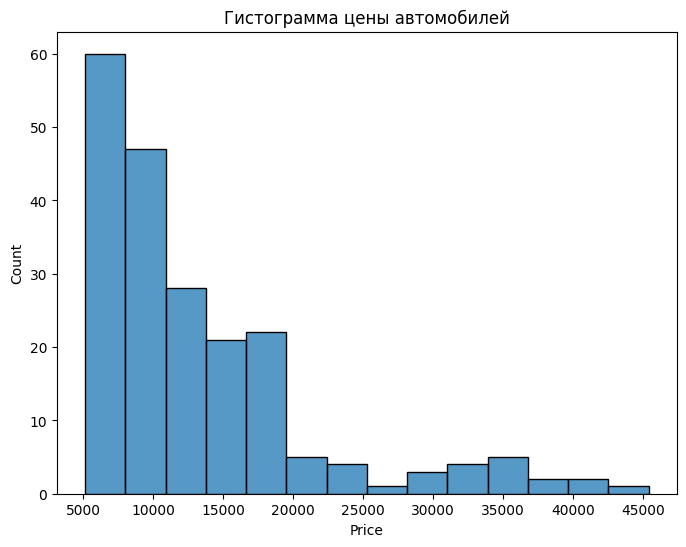

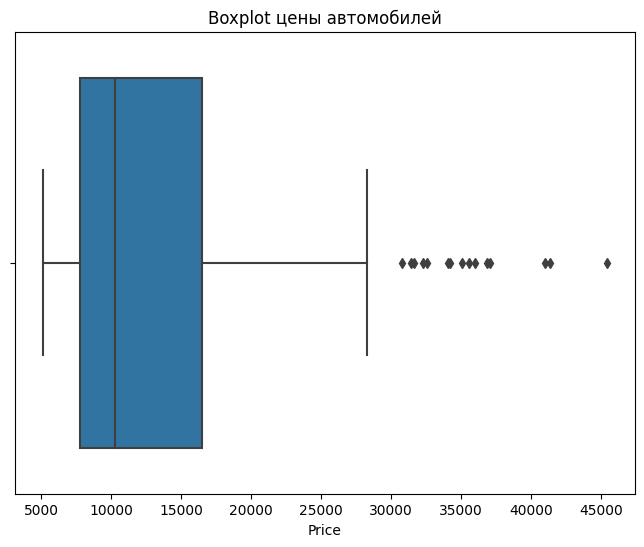

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price'])
plt.xlabel('Price')
plt.title('Гистограмма цены автомобилей')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='price', data=df)
plt.xlabel('Price')
plt.title('Boxplot цены автомобилей')
plt.show()

На основе данных диаграмм можно прийти к выводу, что большая часть автомобилей в наборе данных имеет цену от 5000 до 20000 у.е.. При этом средняя цена составляет около 10000 у.е..

Построение матрицы диаграмм рассеяния на основе числовых признаков в наборе данных относительно цены.

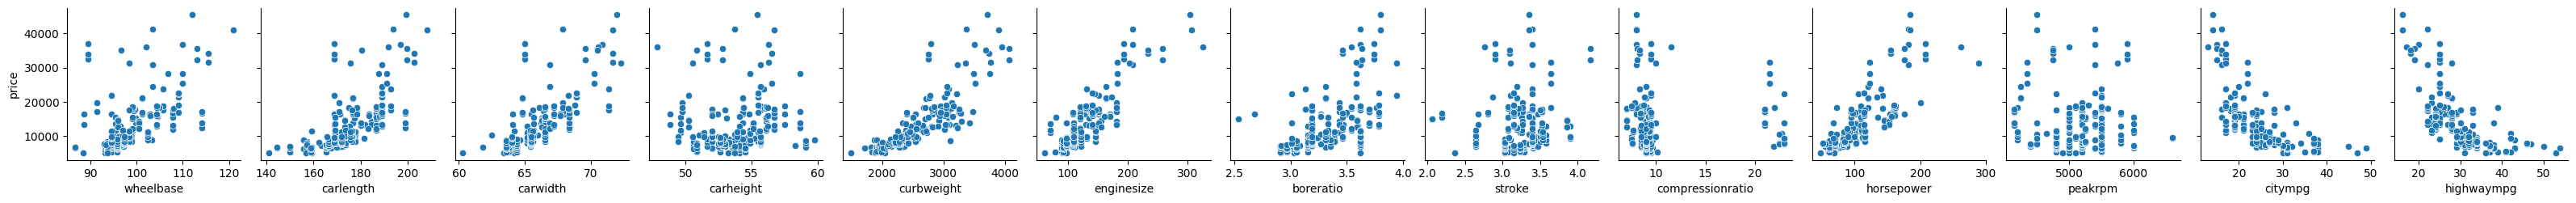

In [ ]:
numeric_features = df[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]

sns.pairplot(df, y_vars = 'price', x_vars=numeric_features)
plt.show()

На основе матрицы можно сделать следующие выводы:


*   Цена не зависит от колесной базы автомобиля.
*   Цена не зависит от длины, ширины и высоты автомобиля.
*   Вес автомобиля, а также размер двигателя линейно влияют на цену автомобиля.
*   Коэффициент расточки вагона, рабочий ход и пиковые обороты не влияют на цену автомобиля.
*   Цена автомобиля линейно зависит от мощности.
*   Цена автомобиля зависит от пробега по городу и шоссе. При большем пробеге автомобиль теряет цену.







Разделение данных на обучающую и валидационные выборки. 25% выборки было отделено на валидацию.

In [ ]:
X = df[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]
y = df['price']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=0)

Стандартизация числовых данных с помощью `StandardScaler`.
Стандартизация преобразует данные таким образом, что их математическое ожидание равно 0, а стандартное отклонение равно 1.

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_valid = scaler.transform(X_valid)


In [ ]:
model = LinearRegression()

Подбор оптимальных параметров.

In [ ]:
parameters = {
    "fit_intercept": [True, False],
    "positive": [True, False]
}

grid = GridSearchCV(model, parameters, scoring="neg_mean_squared_error", cv=5)

grid.fit(X_train, y_train)

best_params = grid.best_params_
print("Лучшие параметры:", best_params)

Лучшие параметры: {'fit_intercept': True, 'positive': True}


С помощью `GridSearchCV` были определены оптимальные параметры для модели линейной регрессии:


*   `fit_intercept: True` - необходимо ли вычислять перехват для данной модели. По умолчанию - `True`.
*   `positive: True` - если задано значение True , коэффициенты должны быть положительными. По умолчанию - `False`.



Обучение модели линейной регрессии. `positive: True` не использовался в качестве параметра так как он "заставляет" коэффициенты быть только положительными, что мешает оценке модели.

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

Применение обученной модели на тестовой выборке и оценка ее качества с помощью метрик.

In [ ]:
y_pred = model.predict(X_valid)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred)) # средняя абсолютная ошибка

print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred)) # среднее значение квадратов ошибок. Чем меньше MSE, тем более точно модель предсказывает значения

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred))) # квадратный корень из среднего квадрата ошибок

print('R2 metric:', metrics.r2_score(y_valid, y_pred)) # коэффициент детерминации. Определяет долю изменений, обусловленных влиянием признаков на целевую переменную


Mean Absolute Error: 2346.284531203264
Mean Squared Error: 12020582.739700774
Root Mean Squared Error: 3467.07120487895
R2 metric: 0.8387970914426266


На основе данных метрик можно сделать следующие выводы:


*   Значение MAE в 2346 говорит о том, что модель в среднем ошибается на эту величину при прогнозировании цен.
*   Значение MSE довольно большое, что может указывать на наличие больших ошибок в модели.
*   Значение RMSE также довольно большое, что указывает на значительную дисперсию ошибок
*   Значение R2 равное 0.838 означает, что модель объясняет около 83.8% изменчивости в данных. Это может интерпретироваться как относительно хорошая предсказательная способность модели.





Создание датафрейма с истинными и предсказанными значениями.

In [ ]:
df_results = pd.DataFrame({'Actual Values': y_valid, 'Predicted Values': y_pred})

df_results.head(20)

,Actual Values,Predicted Values
52,6795.0,6235.425006
181,15750.0,19790.618175
5,15250.0,14979.276121
18,5151.0,-1134.135190
188,9995.0,11132.325482
170,11199.0,13518.177574
76,5389.0,5683.209214
154,7898.0,6283.893658
104,17199.0,23126.985309
33,6529.0,8202.878296


Создание датафрейма с признаками и значениями коэффициентов

In [ ]:
coefficients = model.coef_

feature_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

feature_coefficients['Abs_Coefficient'] = abs(feature_coefficients['Coefficient'])
feature_coefficients = feature_coefficients.sort_values(by='Abs_Coefficient', ascending=False)

feature_coefficients

,Feature,Coefficient,Abs_Coefficient
5,enginesize,4127.331104,4127.331104
11,citympg,-2754.727783,2754.727783
12,highwaympg,2069.988502,2069.988502
4,curbweight,1441.289687,1441.289687
9,horsepower,1390.720616,1390.720616
8,compressionratio,1368.317760,1368.317760
1,carlength,-1308.664850,1308.664850
2,carwidth,1265.316800,1265.316800
10,peakrpm,1099.769694,1099.769694
7,stroke,-895.566976,895.566976


Исходя из полученных результатов, можно сделать следующие выводы:
*   Признаки `enginesize`, `citympg`, `highwaympg` оказывают наибольшее влияние на прогноз цен автомобилей. При том, `enginesize` и `highwaympg` оказывают положительное влияние на цену, а `citympg` - отрицательное.
*   Признаки `wheelbase`, `carheight` и `boreratio` оказывают наименьшее влияние на прогноз цен автомобилей.


Создание графика фактических и предсказанных значений

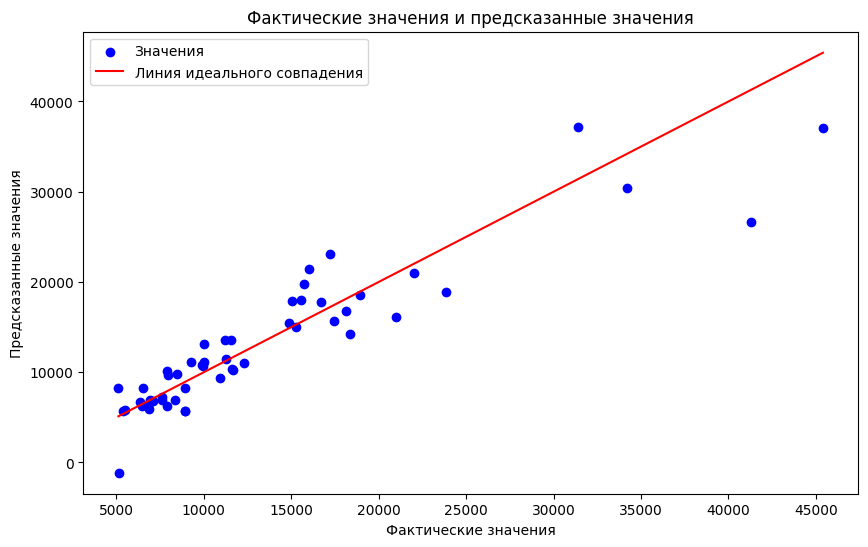

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(y_valid, y_pred, color='blue', label = 'Значения')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактические значения и предсказанные значения')

plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], color='red', label = 'Линия идеального совпадения')

plt.legend()
plt.show()

На основе данного графика можно сделать вывод, что модель достаточно неточно предсказывает цену автомобилей

Реализация регрессии методом k-ближайших соседей, а также вывод датафрейма с фактическими и предсказанными значениями. Количество соседей = 5.

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=5)

knn_model.fit(X_train, y_train)

knn_y_pred = knn_model.predict(X_valid)

df_results = pd.DataFrame({'Actual Values': y_valid, 'Predicted Values': knn_y_pred})

df_results.head(20)

,Actual Values,Predicted Values
52,6795.0,6954.4000
181,15750.0,14729.0000
5,15250.0,11749.6000
18,5151.0,6064.0000
188,9995.0,9897.6000
170,11199.0,10998.8000
76,5389.0,6040.6000
154,7898.0,7084.8000
104,17199.0,17400.8334
33,6529.0,6827.4000


Оценка качества модели на основе 4 метрик.

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, knn_y_pred)) # средняя абсолютная ошибка

print('Mean Squared Error:', metrics.mean_squared_error(y_valid, knn_y_pred)) # среднее значение квадратов ошибок. Чем меньше MSE, тем более точно модель предсказывает значения

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, knn_y_pred))) # квадратный корень из среднего квадрата ошибок

print('R2 metric:', metrics.r2_score(y_valid, knn_y_pred)) # коэффициент детерминации. Определяет долю изменений, обусловленных влиянием признаков на целевую переменную

Mean Absolute Error: 2312.9750000000004
Mean Squared Error: 15319050.589481197
Root Mean Squared Error: 3913.955874748871
R2 metric: 0.7945627458470963


Визуализация фактических и предсказанных значений.

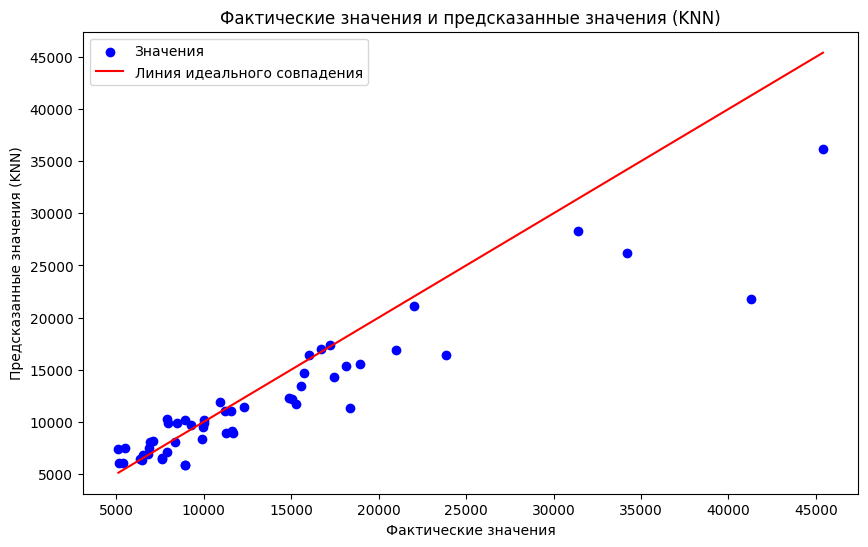

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, knn_y_pred, color='blue', label = 'Значения')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения (KNN)')
plt.title('Фактические значения и предсказанные значения (KNN)')

plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], color='red', label = 'Линия идеального совпадения')

plt.legend()
plt.show()

На основе данных метрик и графика можно прийти к выводу, что полученная модель предсказывает цену хуже чем модель линейной регресии.

Реализация регрессии методом дерева решений, а также вывод датафрейма с фактическими и предсказанными значениями.

In [ ]:
tree_model = DecisionTreeRegressor()

tree_model.fit(X_train, y_train)

tree_y_pred = tree_model.predict(X_valid)

df_results = pd.DataFrame({'Actual Values': y_valid, 'Predicted Values': tree_y_pred})

df_results.head(20)

,Actual Values,Predicted Values
52,6795.0,6095.0
181,15750.0,18280.0
5,15250.0,13950.0
18,5151.0,5195.0
188,9995.0,9960.0
170,11199.0,17669.0
76,5389.0,5572.0
154,7898.0,6918.0
104,17199.0,19699.0
33,6529.0,7129.0


Оценка качества модели на основе 4 метрик.

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, tree_y_pred)) # средняя абсолютная ошибка

print('Mean Squared Error:', metrics.mean_squared_error(y_valid, tree_y_pred)) # среднее значение квадратов ошибок. Чем меньше MSE, тем более точно модель предсказывает значения

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, tree_y_pred))) # квадратный корень из среднего квадрата ошибок

print('R2 metric:', metrics.r2_score(y_valid, tree_y_pred)) # коэффициент детерминации. Определяет долю изменений, обусловленных влиянием признаков на целевую переменную

Mean Absolute Error: 2188.1474423076925
Mean Squared Error: 10616109.218305558
Root Mean Squared Error: 3258.2371335287366
R2 metric: 0.8576318868550793


Визуализация фактических и предсказанных значений.

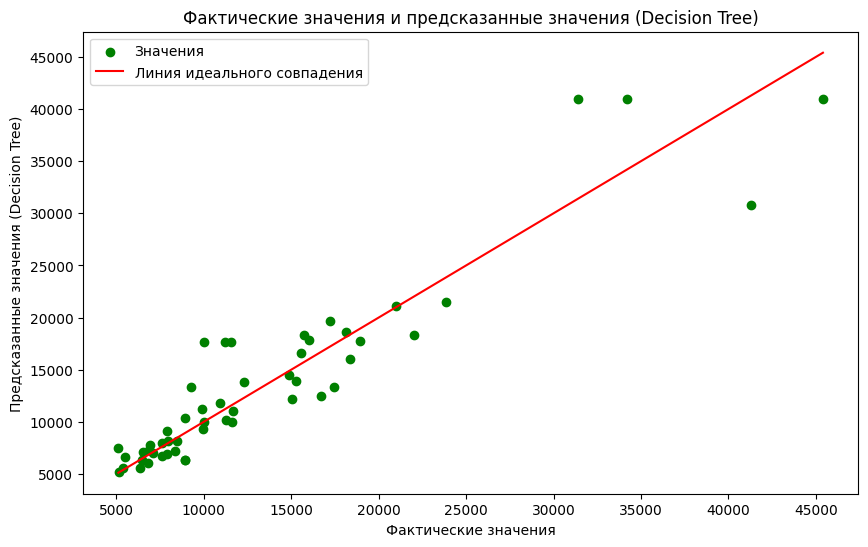

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, tree_y_pred, color='green', label = 'Значения')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения (Decision Tree)')
plt.title('Фактические значения и предсказанные значения (Decision Tree)')

plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], color='red', label='Линия идеального совпадения')
plt.legend()
plt.show()

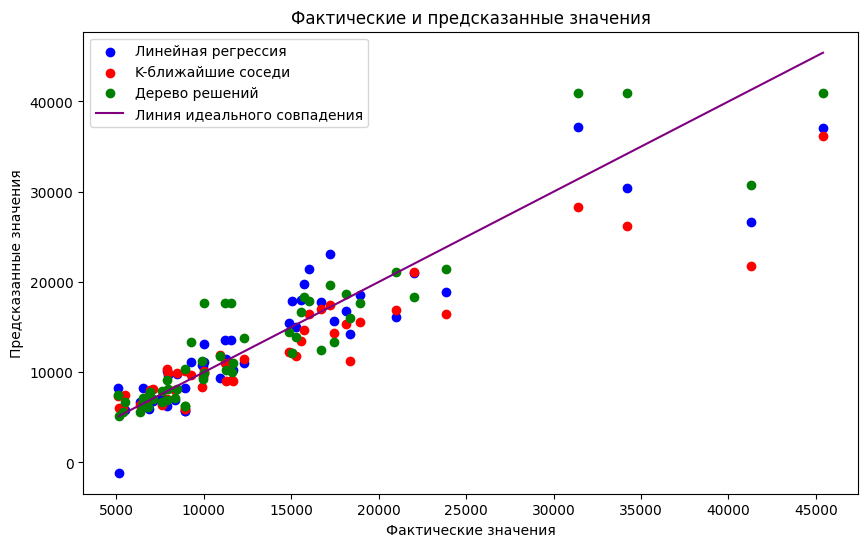

In [ ]:
plt.figure(figsize=(10, 6))

# Визуализация для линейной регрессии
plt.scatter(y_valid, y_pred, color='blue', label='Линейная регрессия')
# Визуализация для K-ближайших соседей
plt.scatter(y_valid, knn_y_pred, color='red', label='K-ближайшие соседи')
# Визуализация для дерева решений
plt.scatter(y_valid, tree_y_pred, color='green', label='Дерево решений')

plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактические и предсказанные значения')

plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], color='purple', label='Линия идеального совпадения')

plt.legend()

plt.show()

На основе полученных метрик и графика можно прийти к выводу что полученная модель прогнозирует цены автомобилей точнее стандартной модели линейной регресии и модели, в которой использовался метод k-ближайших соседей.

*   Лучшие метрики показала модель дерева решений. Метрика R2 выше других моделей, а метрики MAE, MSE, RMSE ниже.
*   На графике можно увидеть, что точки предсказанных и фактических значений для модели дерева решений ближе находятся к линии идеального совпадения.



#Дополнительное задание


Создание модели регрессии методом k-ближайших соседей. Определение оптимальных параметров для модели.

In [ ]:
knn_model = KNeighborsRegressor()

n=[i for i in range(1, 11)]
parameters = {
    "n_neighbors": n,
    "weights": ['uniform', 'distance'],
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

grid = GridSearchCV(knn_model, parameters, scoring="neg_mean_squared_error")

grid.fit(X_train, y_train)

best_params = grid.best_params_
print("Лучшие параметры:", best_params)

Лучшие параметры: {'algorithm': 'brute', 'n_neighbors': 2, 'weights': 'distance'}


`GridSearchCV` определил следующие оптимальные параметры для модели:


*   `n_neighbors` - количество соседей = 2
*   `algorithm` - алгоритм для вычисления ближайших соседей = `brute`
*   `weights` - функция весов, использующихся в предсказаниях = `distance`




Создание модели с использованием оптимальных параметров и тренировка.

In [ ]:
knn_model_optimal = KNeighborsRegressor(n_neighbors = 2, algorithm='brute', weights='distance')
knn_model_optimal.fit(X_train, y_train)

knn_optimal_y_pred = knn_model_optimal.predict(X_valid)


Оценка качества модели на основе 4 метрик.

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, knn_optimal_y_pred)) # средняя абсолютная ошибка

print('Mean Squared Error:', metrics.mean_squared_error(y_valid, knn_optimal_y_pred)) # среднее значение квадратов ошибок. Чем меньше MSE, тем более точно модель предсказывает значения

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, knn_optimal_y_pred))) # квадратный корень из среднего квадрата ошибок

print('R2 metric:', metrics.r2_score(y_valid, knn_optimal_y_pred)) # коэффициент детерминации. Определяет долю изменений, обусловленных влиянием признаков на целевую переменную

Mean Absolute Error: 2136.482892227611
Mean Squared Error: 13192161.213804314
Root Mean Squared Error: 3632.101487266609
R2 metric: 0.8230855521838067


Создание модели линейной регрессии методом k-ближайших соседей с параметрами:
*   `n_neighbors` - количество соседей = 4
*   `algorithm` - алгоритм для вычисления ближайших соседей = `auto` (по умолчанию).
*   `weights` - функция весов, использующихся в предсказаниях = `uniform` (по умолчанию).




In [ ]:
knn_model_inoptimal = KNeighborsRegressor(n_neighbors=4)

knn_model_inoptimal.fit(X_train, y_train)

knn_inoptimal_y_pred = knn_model_inoptimal.predict(X_valid)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, knn_inoptimal_y_pred)) # средняя абсолютная ошибка

print('Mean Squared Error:', metrics.mean_squared_error(y_valid, knn_inoptimal_y_pred)) # среднее значение квадратов ошибок. Чем меньше MSE, тем более точно модель предсказывает значения

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, knn_inoptimal_y_pred))) # квадратный корень из среднего квадрата ошибок

print('R2 metric:', metrics.r2_score(y_valid, knn_inoptimal_y_pred)) # коэффициент детерминации. Определяет долю изменений, обусловленных влиянием признаков на целевую переменную

Mean Absolute Error: 2335.975158653846
Mean Squared Error: 17566577.185329195
Root Mean Squared Error: 4191.250074301126
R2 metric: 0.7644221252003


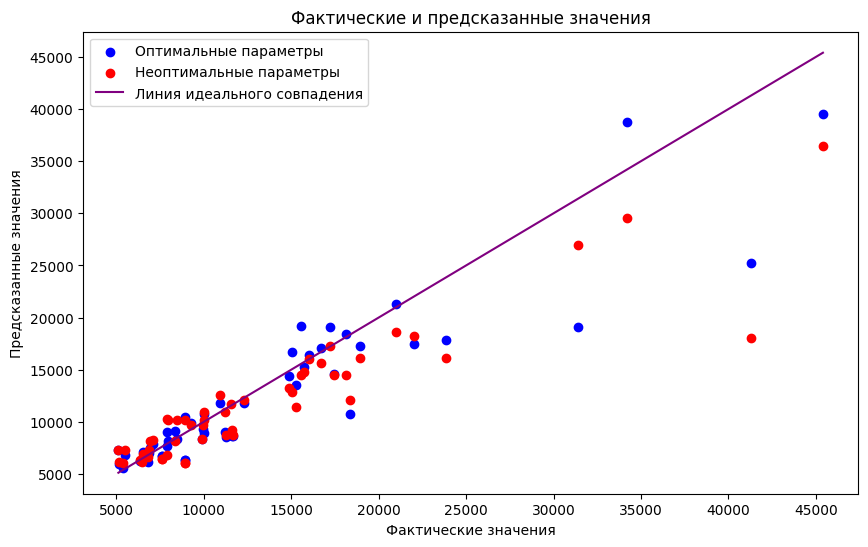

In [ ]:
plt.figure(figsize=(10, 6))

# Визуализация для K-ближайших соседей c оптимальными параметрами
plt.scatter(y_valid, knn_optimal_y_pred, color='blue', label='Оптимальные параметры')
# Визуализация для K-ближайших соседей без выбора оптимальных параметров
plt.scatter(y_valid, knn_inoptimal_y_pred, color='red', label='Неоптимальные параметры')

plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактические и предсказанные значения')

plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], color='purple', label='Линия идеального совпадения')

plt.legend()

plt.show()

На основе полученного графика и метрик можно прийти к выводу:

*   Модель линейной регрессии с использованием метода ближайших соседей точнее прогнозирует цену автомобилей на основе данного датасета. Метрики MAE, MSE, RMSE ниже у модели с использованием оптимальных параметров, что говорит о более высокой точности предсказаний. Метрика R2 в свою очередь выше, что говорит о том, что модель объясняет больший процент изменчивости в данных.




#Вывод


В ходе данной лабораторной работы были изучены различные алгоритмы и методы регрессии, а именно:

*   Обычная линейная регрессия (было установлено, что количество исходных данных сильно влияет на результаты работы модели).
*   Множественная линейная регрессия;
*   Полиномиальная регрессия (было установлено, что повышение степени полинома приводит к переобучению модели).
*   Регрессия методом k-ближайших соседей;

Также было произведено сравнение методов регрессии на датасете, содержащим цену автомобилей как целевой признак и параметры, от которых целевой признак (возможно) зависит. Было установлено:

*   Признаки `enginesize`, `citympg`, `highwaympg` оказывают наибольшее влияние на прогноз цен автомобилей. При том, `enginesize` и `highwaympg` оказывают положительное влияние на цену, а `citympg` - отрицательное.
*   Метод дерева решений наиболее точно прогнозирует цену автомобилей.


Также было произведено сравнение прогнозов моделей регрессии методом k-ближайших соседей для оптимальных (найденных с помощью `GridSearchCV`) и неоптимальных параметров. Было установлено что выбор правильных параметров важен при прогнозировании.
